In [48]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
!python -V

Python 3.12.4


In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets


In [44]:
# dry_bean = pd.concat([X, y], axis=1)
# with open('../data/dry_bean.csv', 'w') as f:
#     dry_bean.to_csv(f, index=False)

In [50]:
X.shape

(13611, 16)

In [6]:
print(f"Sum of null values in features: {X.isnull().sum().sum()} \nSum of null values in target: {y.isnull().sum().sum()}")

Sum of null values in features: 0 
Sum of null values in target: 0


In [41]:
def outlier_detection(df, y):
    for col in df.columns:
        sns.boxplot(x=y.Class, y=df[col])
        plt.title(col)
        plt.show()

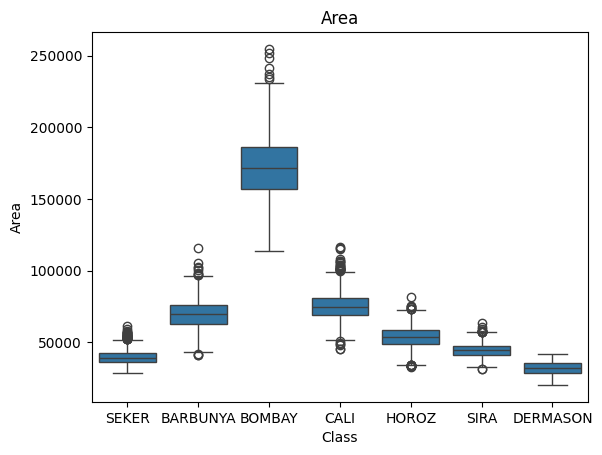

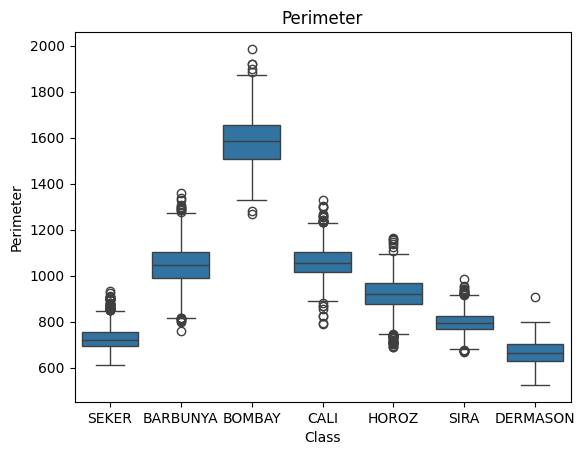

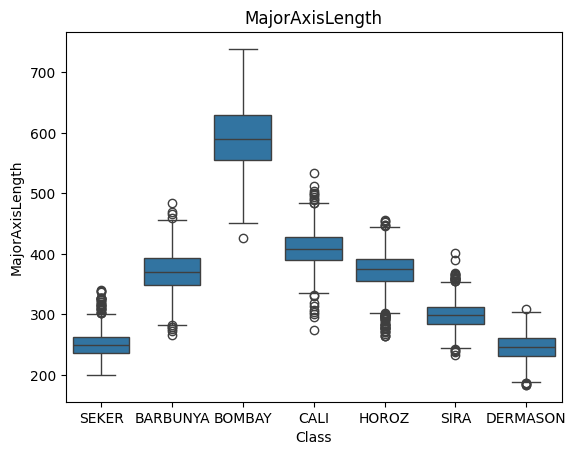

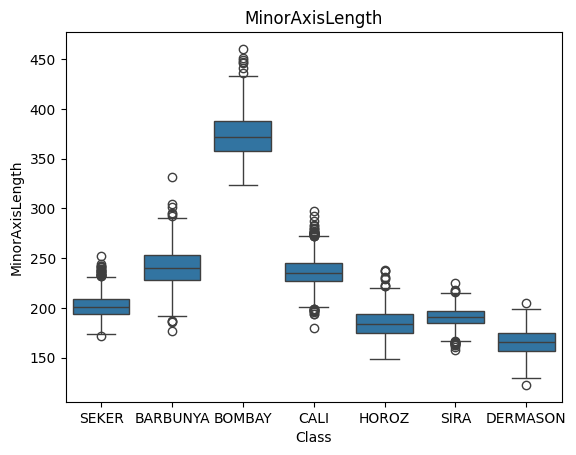

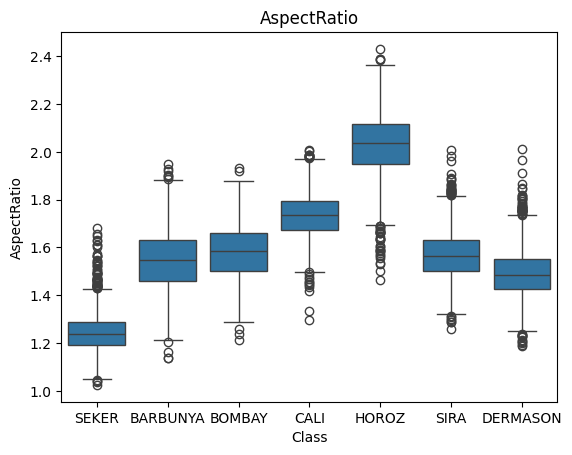

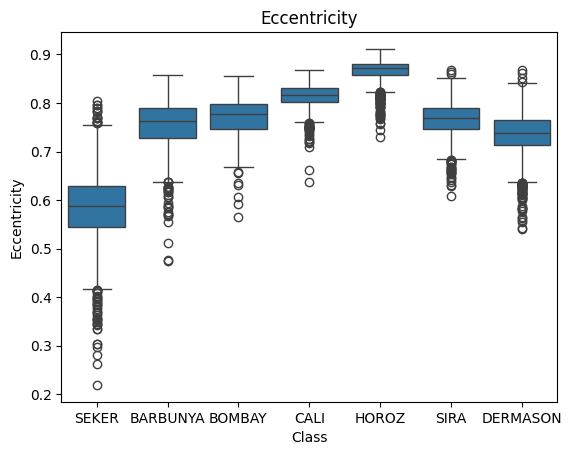

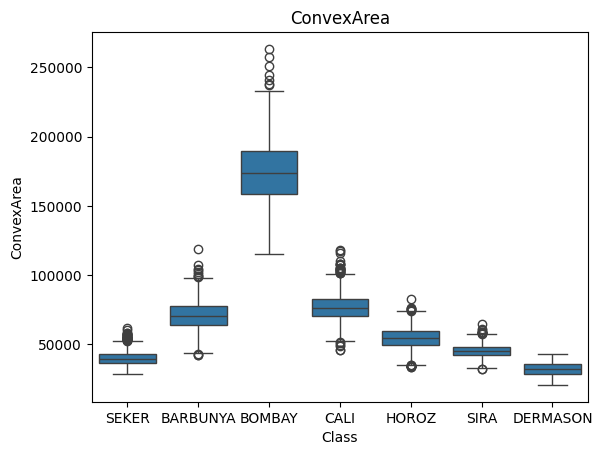

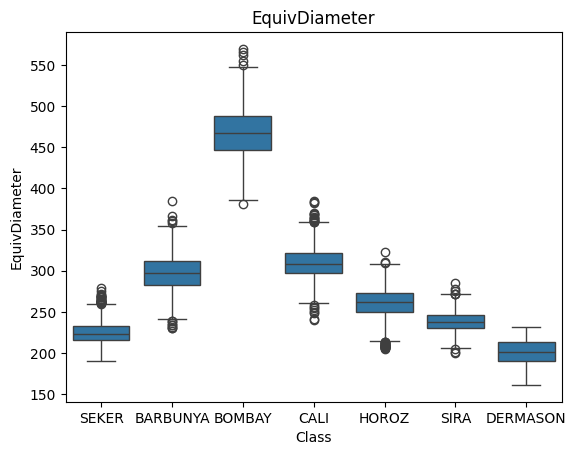

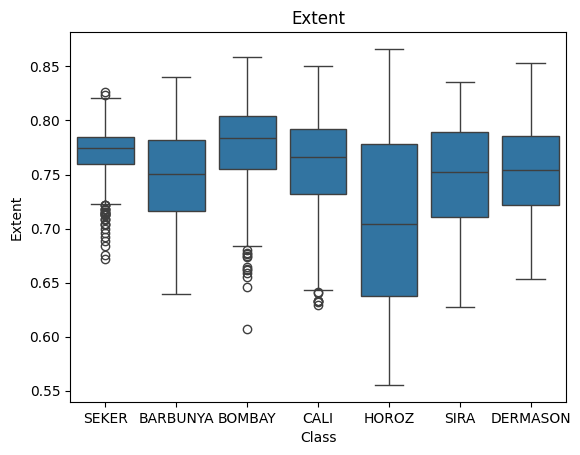

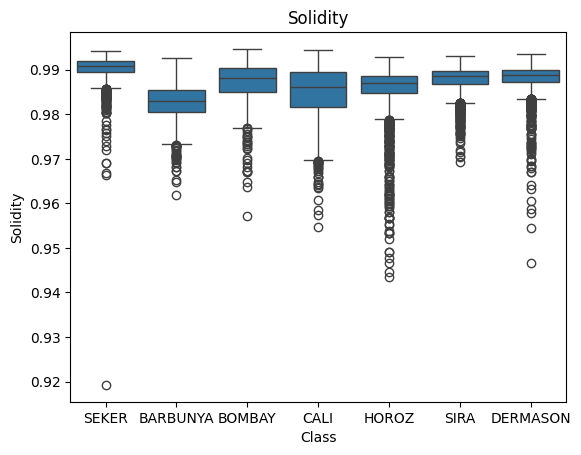

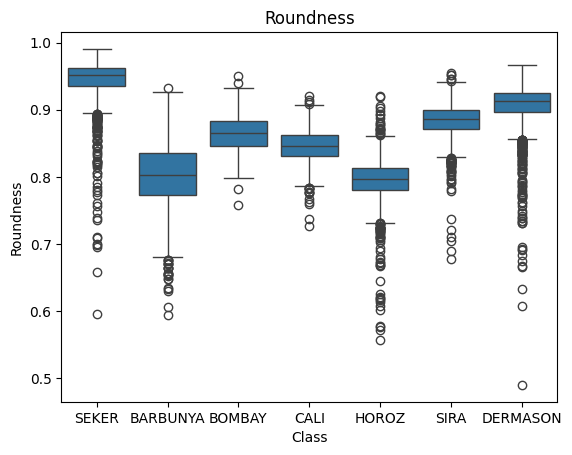

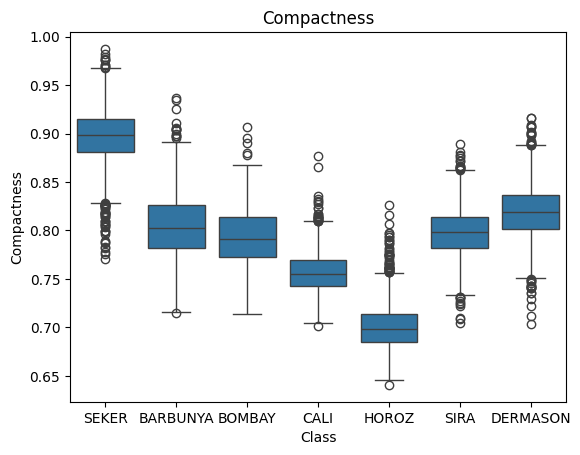

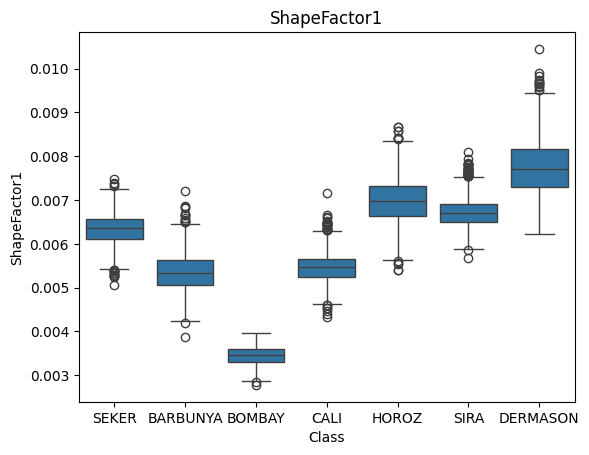

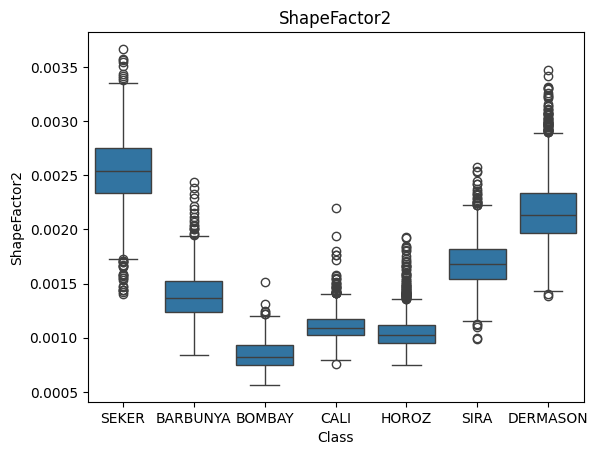

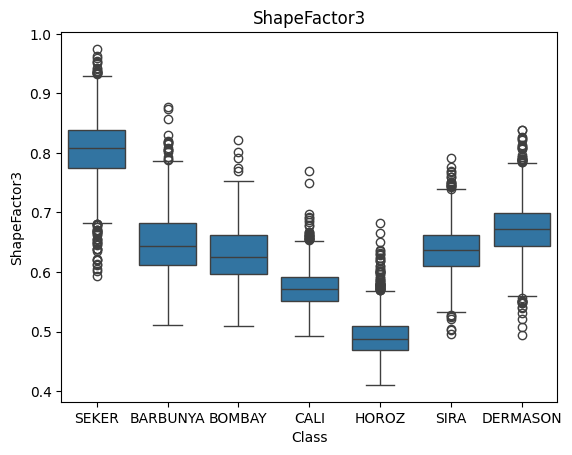

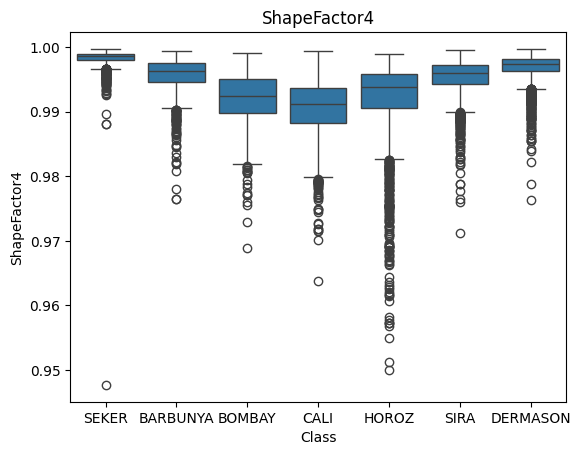

In [42]:
outlier_detection(X, y)

In [62]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

In [63]:
Xx = remove_outliers_iqr(X, X.columns)

In [9]:
def undersample_classes(df, class_column):
    # Identify all unique classes
    classes = df[class_column].unique()

    # Determine the size of the smallest class
    min_class_size = df[class_column].value_counts().min()

    # Initialize an empty list to store the undersampled indices
    undersample_indices = []

    # Loop through each class and randomly select indices
    for cls in classes:
        class_indices = df[df[class_column] == cls].index
        random_class_indices = np.random.choice(class_indices, min_class_size, replace=False)
        undersample_indices.extend(random_class_indices)

    # Create the undersampled DataFrame using the concatenated indices
    undersampled_df = df.loc[undersample_indices]

    return undersampled_df


In [33]:
undersampled_df = undersample_classes(y, "Class")

<Axes: >

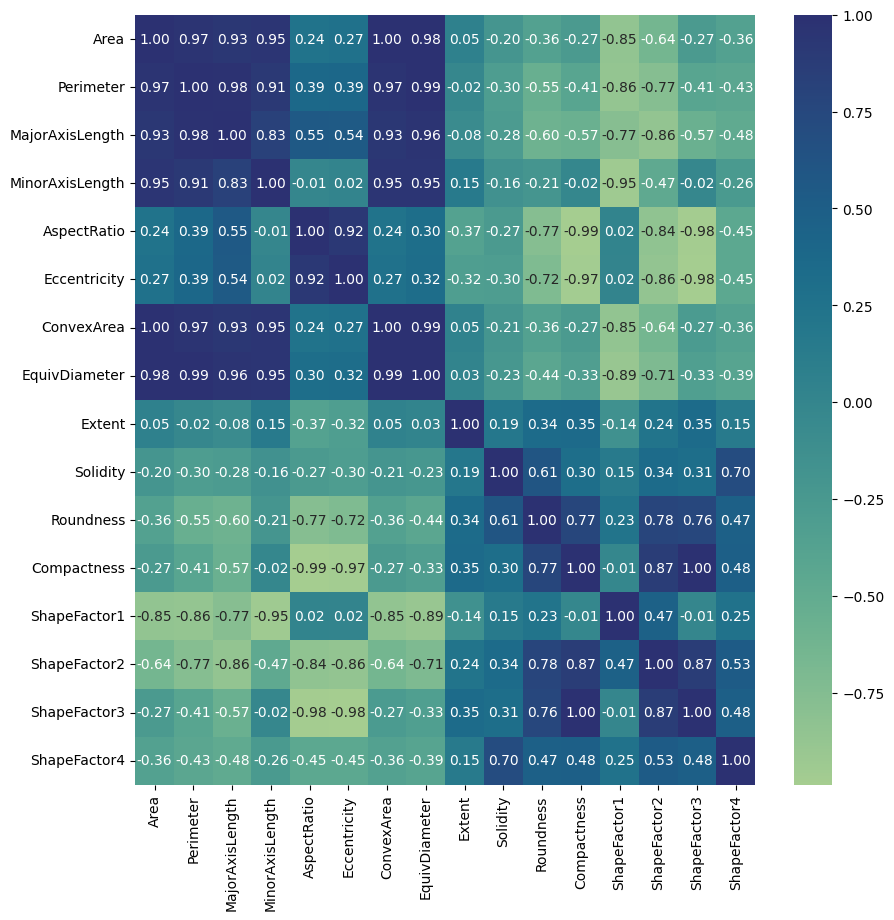

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='crest')

In [7]:
import statsmodels.api as sm

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame and it contains only the features you want to check
X = X[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


           Feature       VIF
0            const   293.123
1             Area 12372.392
2        Perimeter   155.314
3  MajorAxisLength  1094.722
4  MinorAxisLength   813.251
5       ConvexArea 12244.788
6    EquivDiameter  3771.402
